In [430]:
# определения

import pandas as pd
import numpy as np
import seaborn as sns
import re
import pickle
import pymorphy2
import matplotlib.pyplot as plt
#import pandas_profiling
import datetime

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,classification_report,confusion_matrix,roc_curve,auc,precision_recall_curve,precision_score,recall_score,f1_score,accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler


morph = pymorphy2.MorphAnalyzer()
vectorizer = CountVectorizer()
plt.style.use('dark_background')
# Options for pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_columns = 50
pd.options.display.min_rows = 30

In [429]:
# keras
from keras.models import Sequential
from keras.layers import Dense

In [18]:
# здесь "на память" описываю операторы в одну - две строчки 

# PANDAS
# data.iloc[[0,3,100]] - показать строки по индексу 0,3,100
# data.iloc[:,:8] - выбрать первые 8 колонок и все строки
# data[data.Survived == 0 ] - отбор по значению
# data[data.Survived == 0 ][['Sex','Age']] - отбор  и показать только выбранные колонки
# data['new_col'] = data['Survived'] - в новую колонку добавить значение старой колонки
# data.rename(columns = {'new_col':'del_col'}) - переименовать колонку
# data = data.drop(['new_col'],axis = 'columns') - удалить колонку
# del data["column"] - еще один способ удалить колонку
# print(data.groupby(['Sex','Survived'])['PassengerId'].count()) - сгруппировать 
# по колонкам 'Sex','Survived' и подсчету по колонке PassengerId
# data.isna().sum() - показать сколько пустых значений в каждой колонке
# data.Survived.value_counts() - показать сколько уникальных значений в колонке  Survived
# data.Survived.max() - показать максимальное значение в колонке  Survived
# data.Survived.nlagerset(3) - показать 3 максимальных  значения в колонке  Survived
# data.Survived.idxmax() - показать индекс максимальноого значения в колонке  Survived
# data.loc[23] - показать строку 23
# data = data.dropna() - удалить все строки с пропусками
# data.Sex.replace('male', 0, inplace=True) - заменить значения в колонке Sex: mail - 0
# test_out = pd.DataFrame({'PassengerId': test_df.index,'Survived': preds})
# создать новый dataframe для выгрузки на кагл
# data = pd.read_excel("resolution_100.xlsx") - прочитать файл excel
# data.describe() - получаем описание фрэйма, макс, мин, количество и прочее  
# data.fillna(method='ffill', inplace=True) - заполнить все пустые предыдущими значениями
# data = pandas.get_dummies(data,columns=['columns']) - раскрытие строк через доп. столбцы
# data = pd.concat([data_train,data_test]) - объединение таблиц
# data = data.assign(type_age="") - добавить колонку
# data.loc[1,"type_age"] = "a" - записать значение в колонку по строке
# pd.read_html('http://www.contextures.com/xlSampleData01.html') - на сайте найдет таблицы и считает их

# def valuation_formula(x, y): # заполнение ячеек через lambda
#   return x * y * 0.5
# data['price'] = data.apply(lambda row: valuation_formula(row['x'], row['y']), axis=1)

# for idx,row in anime[:2].iterrows(): - обход элементов dataframe
#    print(idx, row)
# data['price'] = data['price'].apply(функция) - применение функции к столбцу
# data.map({'cat': 'kitten', 'dog': 'puppy'}) - замена значений по словарю

# sex_stats = df.pivot_table(values='suicides_no', index=['year'], columns=['sex'], aggfunc='mean')
# Как и в Excel, здесь есть сводные таблицы (pivot_table). Параметрами метода являются:
# values – список переменных, по которым будут считаться статистики,
# index – список переменных, по которым нужно сгруппировать данные, будут индексами сводной таблицы,
# columns – список переменных, по которым нужно сгруппировать данные, будут столбцами сводной таблицы,
# aggfunc — функция аггрегации, т.е. рассчитываемая статистика для данных

#PANDAS PROFILING
# pandas_profiling.ProfileReport(df)

# SEABORN
# sns.heatmap(data.corr()) - вывести график корреляций по всем колонкам
# sns.boxplot(titanic['age']) - ящик с усами
# sns.countplot(x) - строит bar по данным
# sns.countplot(x="pclass", data=titanic, hue="sex") - бар по двум колонкам

# SKLEARN
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) 
# разбить данные на тренировочную и тестовую выборку
# 20 процентов на тестовую , случайность выборки зафиксирована
# accuracy_score(y_test,y_pred) - коэффециент проверки на проверочной выборке
# vectorizer.get_feature_names() - посмотреть словарь векторов текста
# чтобы получить сгенерированный словарь, из приведенной структуры CountVectorizer, 
# стоит отметить что порядок совпадает с матрице
# text_vector_array = text_vector.toarray() - покаазть матрицу

# kf = KFold(n_splits=5, random_state=1, shuffle=True) подготовка кросс-валидации
# model = RandomForestRegressor(random_state=1) объявляем модель
# score = np.mean(cross_val_score(estimator=model, X=X, y=y, cv=kf, scoring='r2')) - рассчитываем коэффициент r2

# PICKLE
# model = pickle.load(open("filename", 'rb')) - загрузка модели из файла
# pickle.dump(model, open("filename", 'wb')) - сохрванение модели в файл

# MATPLOTLIB
# plt.plot(x, y, label='sin') - нарисовать простой график
# plt.scatter(x, y, c=colors, s=sizes, alpha=0.5, cmap='plasma',label='sin') - или рисуем точки на графике
# plt.grid() - показать сетку
# plt.xlabel('Ось x') - название оси Х
# plt.colorbar() -  показать легенду цветов, если c=colors
# plt.legend() - показать легенду
# plt.show() - показать график
# plt.savefig('имя_файла') - сохранение графика
# plt.hexbin(x, y, cmap='inferno') - тепловая карта
# plt.hist(x, color='r', orientation='horizontal') - сторим гистограмму

In [ ]:
# из примера титаник сайта кагл DecisionTreeClassifier
# dt = DecisionTreeClassifier(random_state=1)
# dt.fit(X_train, y_train)
# preds = dt.predict(X_test)
# acc = accuracy_score(y_true=y_test, y_pred=preds)
# f1 = f1_score(y_true=y_test, y_pred=preds)
# print(classification_report(y_true=y_test, y_pred=preds))

In [ ]:
# предсказание простое RandomForestClassifier
# clf = RandomForestClassifier(random_state=241)
# clf.fit(X, Y)
## расчет веса показателей
# importances = clf.feature_importances_
# print(importances)

In [ ]:
# использование GridSearchCV на примере RandomForestClassifier

# clf = RandomForestClassifier()

# здесь пишем какие параметры будет перебирать

# param_greed = {
#    "max_depth" : [2,5,10],
#    "criterion" : ['gini', 'entropy'],
#    "min_samples_split" : [2,5,10],
#    "min_samples_leaf" : [1,5,10],
#}

# пишем каие параметры перебираем scoring = как оцениваем  ,
# cv = сколько тестовых выборок, n_jobs = -1 используем все процссоры
#GS = GridSearchCV(clf,param_greed,scoring = 'roc_auc',cv = 6,n_jobs = -1)
#GS.fit(X,Y)

# лучший показатель
#GS.best_score_

# лучшие параметры
# GS.best_params_

# обращаемся
# GS.best_estimator_.feature_importances_

# предсказываем
# GS.best_estimator_.predict(may_sample_dataframe)

In [2]:
# универсальные функции

# загрузать файл из csv
def read_csv(path,index_c = ""):
    if index_c == "":
        return pd.read_csv(path)
    else:
        return pd.read_csv(path,index_col=index_c)
    
# показать все уникальные значения во всех колонках
def columns_unique(data):
    for col in data.columns:
        print(col, data[col].unique())

# заполнить пустые значения средним значением
def null_to_mean(data,column):
    num_mean = data[column].mean()
    data[column].fillna(num_mean, inplace=True)

# заполнить пустые значения модой
def null_to_mode(data,column):
    num_mode  = data[column].mode().values[0]
    data[column].fillna(num_mode, inplace=True)

# функция для лемматизации
def lemmatize(text):
    text_str = str(text)
    text_str = re.sub(r'[^\w\s]+|[\d]+', r'',text_str).strip()
    words = text_str.split() # разбиваем текст на слова
    res = ""
    for word in words:
        p = morph.parse(word)[0]
        res = res + " " + p.normal_form
    return res

# провести лемматизацию датафрэйм
def lemma_dataframe(data,column):
    data[column] = data.apply(lambda row: lemmatize(row[column]), axis=1)
    
# векторизация, создание векторов
def vector_text(data,column):
    text = data[column]
    # создаем векторы
    return vectorizer.fit_transform(text)  

# предобработка

In [359]:
data = pd.read_excel("/Users/alexeyvaganov/doc/files/polomki_1.xlsx")

In [360]:
def yyear_from(s_):
    text_str = str(s_)
    return text_str[6:10]

In [361]:
data["rem_v_posl_mes"].fillna(0,inplace=True)
data["sum_rem_v_posl_mes"].fillna(0,inplace=True)
data["prizn"].fillna(0,inplace=True)
data["stoim_rem_prizn"].fillna(0,inplace=True)
data["probeg"].fillna(0,inplace=True)
data["year_v"].fillna(0,inplace=True)

In [362]:
data['date_'] = pd.to_datetime(data['date'], format='%d.%m.%Y %H:%M:%S')

In [363]:
del data["date"]

In [364]:
data['year_v'] = data.apply(lambda row: yyear_from(row['year_v']), axis=1)

In [365]:
data.year_v.replace('', "0", inplace=True)

In [366]:
data['year_v'] = data['year_v'].astype(int)
data['prizn'] = data['prizn'].astype(int)
data['rem_v_posl_mes'] = data['rem_v_posl_mes'].astype(int)
# !!!!
data['sum_rem_v_posl_mes'] = data['sum_rem_v_posl_mes'].astype(int)
data['stoim_rem_prizn'] = data['stoim_rem_prizn'].astype(int)

In [36]:
data.to_excel("polomki_podg_for_analize.xlsx")

In [431]:
data_ = pd.read_excel("polomki_podg_for_analize1.xlsx")

# анализ

In [432]:
data_['sum_rem_v_posl_mes'] = data_['sum_rem_v_posl_mes'].astype(int)
data_['stoim_rem_prizn'] = data_['stoim_rem_prizn'].astype(int)

In [433]:
data_tip_ts = data_.groupby(by = 'tip_ts').count()
data_tip_ts.sort_values(by="os")

,date_del,year_v,num_os,os,probeg,ob_st_rem,rem_v_posl_mes,sum_rem_v_posl_mes,prizn,stoim_rem_prizn,date_
tip_ts,,,,,,,,,,,
TCM FD50T9,0,9,9,9,9,9,9,9,9,9,9
Автомобиль грузовой HINO-300 XZU720L-QKFRPW3,0,10,10,10,10,10,10,10,10,10,10
Ролл-трейлер г/п 65-75т.,10,10,10,10,10,10,10,10,10,10,10
Автомобиль Hyundai SANTA FE,0,12,12,12,12,12,12,12,12,12,12
Автомобиль Тойота Камри 2005 г/в,0,12,12,12,12,12,12,12,12,12,12
МАШИНА ПОДМЕТАЛЬНО УБОРОЧНАЯ HAKO-CITYMASTER,0,13,13,13,13,13,13,13,13,13,13
ЭКСКАВАТОР КОЛЕСНЫЙ VOLVO,0,13,13,13,13,13,13,13,13,13,13
АВТОМОБИЛЬ ЛЕГКОВОЙ Н-1,0,16,16,16,16,16,16,16,16,16,16
Автомашина КО-505А вакуумная КАМАЗ,0,22,22,22,22,22,22,22,22,22,22


In [452]:
data_roll = data_[data_.tip_ts == "Ролл-трейлер"]
data_d40 = data_[data_.tip_ts == "Тойота 7FD40"]

In [371]:
print(len(data_roll["os"].unique()))
print(len(data_d40["os"].unique()))

23
16


In [435]:
print(data_d40["os"].unique())

['Автопогрузчик Тойота 4т'
 'Погрузчик Тойота 02-7FDK-40 (номер рамы 7FDK40-32010)'
 'Автопогрузчик Toyota модель 8FD50N (сер. номер 8FD50N-11290)'
 'Автопогрузчик TOYOTA 8FD50N (серийный номер 8FD50N-11423)'
 'Автопогрузчик TOYOTA 8FD50N (серийный номер 8FD50N-11425)'
 'Автопогрузчик TOYOTA 8FD50N (серийный номер 8FD50N-11489)'
 'Автопогрузчик Toyota 8FD50N (серийный номер 8FD50N-12173)'
 'Автопогрузчик Toyota 8FD50N (серийный номер 8FD50N-12193)'
 'Автопогрузчик Toyota модель 8FD50N (сер. номер 8FD50N-11292)'
 'Автопогрузчик Toyota 8FD50N (серийный номер 8FD50N-12183)'
 'Автопогрузчик Toyota 8FD50N (серийный номер 8FD50N-12184)'
 'Автопогрузчик TOYOTA 8FD50N (серийный номер 8FD50N-11428)'
 'Автопогрузчик Toyota 8FD50N (серийный номер 8FD50N-12196)'
 'Автопогрузчик Toyota 8FD50N (серийный номер 8FD50N-12185)'
 'Автопогрузчик Toyota 8FD50N (серийный номер 8FD50N-12172)'
 'Автопогрузчик Toyota 8FD50N (серийный номер 8FD50N-12180)']


In [77]:
data_d40.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3051 entries, 11434 to 14484
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date_del            325 non-null    object        
 1   tip_ts              3051 non-null   object        
 2   year_v              3051 non-null   int64         
 3   num_os              3051 non-null   object        
 4   os                  3051 non-null   object        
 5   probeg              3051 non-null   float64       
 6   ob_st_rem           3051 non-null   float64       
 7   rem_v_posl_mes      3051 non-null   int64         
 8   sum_rem_v_posl_mes  3051 non-null   int64         
 9   prizn               3051 non-null   int64         
 10  stoim_rem_prizn     3051 non-null   int64         
 11  date_               3051 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 309.9+ KB


In [75]:
data_d40.describe()

,year_v,probeg,ob_st_rem,rem_v_posl_mes,sum_rem_v_posl_mes,prizn,stoim_rem_prizn
count,3051.000,3051.000,3051.000,3051.000,3051.000,3051.000,3051.000
mean,2003.018,5616.148,167518.929,0.236,3492.914,0.235,3329.817
std,5.860,3336.046,170050.673,0.424,23692.826,0.424,20150.478
min,1994.000,149.100,31.500,0.000,0.000,0.000,0.000
25%,2000.000,2828.000,46648.020,0.000,0.000,0.000,0.000
50%,2002.000,5324.500,118039.120,0.000,0.000,0.000,0.000
75%,2003.000,8241.155,226818.630,0.000,0.000,0.000,0.000
max,2017.000,16574.000,1363376.390,1.000,719696.000,1.000,501370.000


In [85]:
def obrez_stoim(s_):
    if s_ >= 1000:
        return 1
    else:
        return 0

In [173]:
def udal_stoim(s_):
    if s_ <= 1000:
        return 0
    else:
        return s_

In [195]:
def okr_probeg(s_):
    return s_ // 100 * 100

In [175]:
data_d40["rem_v_posl_mes_"] = data_d40.apply(lambda row: obrez_stoim(row['sum_rem_v_posl_mes']), axis=1)
data_d40["sum_rem_v_posl_mes_"] = data_d40.apply(lambda row: udal_stoim(row['sum_rem_v_posl_mes']), axis=1)
data_d40["prizn_"] = data_d40.apply(lambda row: obrez_stoim(row['stoim_rem_prizn']), axis=1)

/Users/alexeyvaganov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [199]:
data_d40["probeg"] = data_d40.apply(lambda row: okr_probeg(row['probeg']), axis=1)

/Users/alexeyvaganov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [178]:
del data_d40["rem_v_posl_mes"]
del data_d40["prizn"]
del data_d40["sum_rem_v_posl_mes"]

<AxesSubplot:>

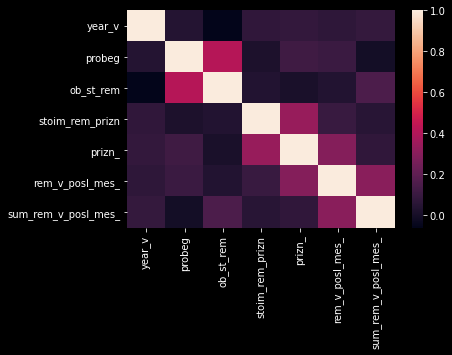

In [179]:
sns.heatmap(data_d40.corr())

In [218]:
data_d40_os1 = data_d40[data_d40.os == "Автопогрузчик TOYOTA 8FD50N (серийный номер 8FD50N-11425)"]
data_d40_os2 = data_d40[data_d40.os == "Автопогрузчик Toyota модель 8FD50N (сер. номер 8FD50N-11290)"][data_d40.prizn == 1 ]

/Users/alexeyvaganov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [219]:
data_d40_os1

,date_del,tip_ts,year_v,num_os,os,probeg,ob_st_rem,rem_v_posl_mes,sum_rem_v_posl_mes,prizn,stoim_rem_prizn,date_
13096,NaN,Тойота 7FD40,2016,S00040458,Автопогрузчик TOYOTA 8FD50N (серийный номер 8F...,2827.900,34.600,1,34,0,0,2017-03-31 23:59:59
13126,NaN,Тойота 7FD40,2016,S00040458,Автопогрузчик TOYOTA 8FD50N (серийный номер 8F...,3115.400,34.600,0,0,0,0,2017-04-30 23:59:59
13156,NaN,Тойота 7FD40,2016,S00040458,Автопогрузчик TOYOTA 8FD50N (серийный номер 8F...,3392.700,34.600,0,0,0,0,2017-05-31 23:59:59
13187,NaN,Тойота 7FD40,2016,S00040458,Автопогрузчик TOYOTA 8FD50N (серийный номер 8F...,3579.100,34.600,0,0,0,0,2017-06-30 23:59:59
13218,NaN,Тойота 7FD40,2016,S00040458,Автопогрузчик TOYOTA 8FD50N (серийный номер 8F...,3760.200,34.600,0,0,0,0,2017-07-31 23:59:59
13250,NaN,Тойота 7FD40,2016,S00040458,Автопогрузчик TOYOTA 8FD50N (серийный номер 8F...,3954.800,34.600,0,0,0,0,2017-08-31 23:59:59
13282,NaN,Тойота 7FD40,2016,S00040458,Автопогрузчик TOYOTA 8FD50N (серийный номер 8F...,4140.900,34.600,0,0,0,0,2017-09-30 23:59:59
13314,NaN,Тойота 7FD40,2016,S00040458,Автопогрузчик TOYOTA 8FD50N (серийный номер 8F...,4292.500,34.600,0,0,0,0,2017-10-31 23:59:59
13348,NaN,Тойота 7FD40,2016,S00040458,Автопогрузчик TOYOTA 8FD50N (серийный номер 8F...,4543.900,34.600,0,0,0,0,2017-11-30 23:59:59
13365,NaN,Тойота 7FD40,2016,S00040458,Автопогрузчик TOYOTA 8FD50N (серийный номер 8F...,4771.600,34.600,0,0,0,0,2017-12-31 23:59:59


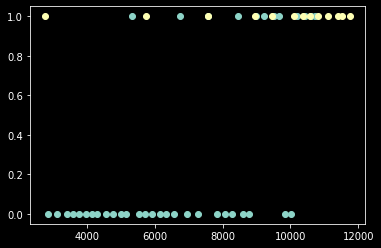

In [169]:
plt.scatter(data_d40_os1["probeg"], data_d40_os1["prizn_"])
plt.scatter(data_d40_os2["probeg"], data_d40_os2["prizn_"])
plt.show()

# RandomForestClassifier 1

In [214]:
X_ = data_d40[["year_v","probeg","ob_st_rem","rem_v_posl_mes","sum_rem_v_posl_mes"]]
y_ = data_d40.prizn

In [215]:
X_

,year_v,probeg,ob_st_rem,rem_v_posl_mes,sum_rem_v_posl_mes
11434,2002,3786.500,45628.640,0,0
11435,1999,1283.400,126381.390,1,1046
11436,2001,4121.200,38650.510,0,0
11437,2001,6520.000,127852.760,0,0
11438,2003,1695.000,105575.460,1,66844
11439,2001,1972.400,104685.210,0,0
11440,2002,4053.000,26091.880,0,0
11441,2002,2603.500,18865.310,0,0
11442,2001,531.000,100340.290,1,63299
11443,2001,1464.000,30888.290,1,7513


In [216]:
clf = RandomForestClassifier()

# здесь пишем какие параметры будет перебирать

param_greed = {
    "max_depth" : [2,5,50],
    "criterion" : ['gini', 'entropy'],
    "min_samples_split" : [2,5,50],
    "min_samples_leaf" : [1,5,50],
}

# пишем каие параметры перебираем scoring = как оцениваем  ,
#cv = сколько тестовых выборок, n_jobs = -1 используем все процссоры
GS = GridSearchCV(clf,param_greed,scoring = 'roc_auc',cv = 6,n_jobs = -1)
GS.fit(X_,y_)

# лучший показатель
print(GS.best_score_)

# лучшие параметры
print(GS.best_params_)

0.7715022148533791
{'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 50, 'min_samples_split': 5}


# логистическая регрессия

In [114]:
X_lr = data_d40[["year_v","probeg","ob_st_rem","sum_rem_v_posl_mes","rem_v_posl_mes_"]]
y_lr = data_d40.prizn_

In [118]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_lr)
# Transform both the training and testing data
X_tr = scaler.transform(X_lr)

In [122]:
log_reg = LogisticRegression()

# здесь пишем какие параметры будет перебирать

param_greed = {
    "penalty" : ["l", "l2", "elasticnet", "none"],
}

# пишем каие параметры перебираем scoring = как оцениваем  ,
#cv = сколько тестовых выборок, n_jobs = -1 используем все процссоры
GS = GridSearchCV(log_reg,param_greed,scoring = 'roc_auc',cv = 6,n_jobs = -1)
GS.fit(X_tr,y_)

# лучший показатель
print(GS.best_score_)

# лучшие параметры
print(GS.best_params_)

0.6494987875543788
{'penalty': 'none'}


# градиентный бустинг

In [130]:
gr_b = GradientBoostingClassifier()

# здесь пишем какие параметры будет перебирать

param_greed = {
    "n_estimators" : [100,1000],
    "min_samples_split" : [2,50],
    "min_samples_leaf" : [1,50],
}

# пишем каие параметры перебираем scoring = как оцениваем  ,
#cv = сколько тестовых выборок, n_jobs = -1 используем все процссоры
GS = GridSearchCV(gr_b,param_greed,scoring = 'roc_auc',cv = 6,n_jobs = -1)
GS.fit(X_,y_)

# лучший показатель
print(GS.best_score_)

# лучшие параметры
print(GS.best_params_)



0.7086810303720834
{'min_samples_leaf': 50, 'min_samples_split': 2, 'n_estimators': 100}


# случайный лес по годам

In [451]:
data_uni = data_d40["num_os"].unique()
print(len(data_uni))
os_s_probegom = []
for x in data_uni:
    data_it_os = data_d40[data_d40.num_os == x]  
    print ("-------------")
    print(x)
    print(len(data_it_os))
    print((data_it_os.iloc[len(data_it_os)-1].probeg - data_it_os.iloc[0].probeg))
    if (data_it_os.iloc[len(data_it_os)-1].probeg - data_it_os.iloc[0].probeg) > 1000:
        os_s_probegom.append(x)
print(os_s_probegom)
print(len(os_s_probegom))

45
-------------
24342
90
5000.5
-------------
19630
90
2351.2
-------------
23047
62
5225.400000000001
-------------
23064
40
6845.0
-------------
31081
90
8579.0
-------------
24350
90
12521.0
-------------
24345
90
6452.9
-------------
23048
18
2233.0
-------------
23063
90
3668.0
-------------
31085
90
1066.8000000000002
-------------
24349
90
5291.0
-------------
16114
90
1760.0
-------------
23049
41
3947.0
-------------
24339
18
2519.0
-------------
31082
90
4306.209999999999
-------------
23067
90
8036.0
-------------
19631
33
1255.0100000000002
-------------
24348
90
4291.0
-------------
24347
36
6776.0
-------------
24346
90
7572.6
-------------
23062
12
1943.0
-------------
31084
90
2905.9300000000003
-------------
24343
90
4021.0
-------------
31086
90
6047.5
-------------
20972
90
1032.0
-------------
19629
90
6425.5
-------------
20966
90
5664.299999999999
-------------
20961
40
6728.0
-------------
23046
90
1309.6000000000004
-------------
24340
90
3548.0
-------------
S

In [437]:
len(data_d40)

3051

In [453]:
data_d40 = data_d40.loc[data_d40['num_os'].isin(os_s_probegom)] 

In [439]:
#data_d40_ = data_d40[["year_v","probeg","ob_st_rem","rem_v_posl_mes","sum_rem_v_posl_mes"]]

In [440]:
#data_d40_ = data_d40_.drop_duplicates(subset=["year_v","probeg","ob_st_rem","rem_v_posl_mes","sum_rem_v_posl_mes"], keep=False)

In [441]:
len(data_d40_test)

108

In [454]:
data_d40_train = data_d40[data_d40.date_ < '2020-01-01 00:00:00']
data_d40_test = data_d40[data_d40.date_ >= '2020-01-01 00:00:00']

In [455]:
data_d40_train = data_d40_train[["year_v","probeg","ob_st_rem","rem_v_posl_mes","sum_rem_v_posl_mes","prizn"]]
data_d40_train = data_d40_train.drop_duplicates(subset=["year_v","probeg","ob_st_rem","rem_v_posl_mes","sum_rem_v_posl_mes","prizn"], keep=False)

In [456]:
data_d40_test = data_d40_test[["year_v","probeg","ob_st_rem","rem_v_posl_mes","sum_rem_v_posl_mes","prizn"]]
data_d40_test = data_d40_test.drop_duplicates(subset=["year_v","probeg","ob_st_rem","rem_v_posl_mes","sum_rem_v_posl_mes","prizn"], keep=False)

In [457]:
X_train = data_d40_train[["year_v","probeg","ob_st_rem","rem_v_posl_mes","sum_rem_v_posl_mes"]]
y_train = data_d40_train.prizn

X_test = data_d40_test[["year_v","probeg","ob_st_rem","rem_v_posl_mes","sum_rem_v_posl_mes"]]
y_test = data_d40_test.prizn

In [447]:
#X_train = X_train.drop_duplicates(subset=["year_v","probeg","ob_st_rem","rem_v_posl_mes","sum_rem_v_posl_mes"], keep=False)

In [458]:
print(len(X_train))
print(len(y_train))

1610
1610


In [459]:
# предсказание простое RandomForestClassifier
clf = RandomForestClassifier(random_state=241)
clf.fit(X_train, y_train)
## расчет веса показателей
# importances = clf.feature_importances_
# print(importances)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=241,
                       verbose=0, warm_start=False)

In [460]:
y_pred = clf.predict(X_test)

In [427]:
len(y_pred)

108

In [461]:
accuracy_score(y_test,y_pred) 

0.5277777777777778

In [402]:
f1_score(y_test,y_pred) 

0.46938775510204084

In [246]:
data_y_pred = pd.DataFrame(y_pred,columns={"prizn_pred"})

In [252]:
data_d40_test_ = data_d40_test.reset_index()

In [254]:
data_it = pd.concat([data_d40_test_,data_y_pred],axis=1)

In [272]:
os_uni = data_it["num_os"].unique()

In [302]:
len(os_uni)

41

In [297]:
prav_otvet = 0
bil_probeg = 0
prav_otvet_u_bil_probeg = 0
for x in os_uni:
    data_it_os = data_it[data_it.num_os == x]  
    print ("-------------")
    print(x)
    print((data_it_os.iloc[4].probeg - data_it_os.iloc[0].probeg) / 5)
    bil_probeg_u_os = 0
    if (data_it_os.iloc[4].probeg - data_it_os.iloc[0].probeg) / 5 != 0:
        bil_probeg += 1
        bil_probeg_u_os = 1
    prav_otvet_os = 0
    for idx,row in data_it_os.iterrows(): 
        if row["prizn"] == row["prizn_pred"]:
            prav_otvet += 1
            prav_otvet_os += 1
    print ("po",prav_otvet_os)
    if bil_probeg_u_os == 1:
        prav_otvet_u_bil_probeg = prav_otvet_u_bil_probeg + prav_otvet_os
    print(data_it_os[["ob_st_rem","probeg","prizn","prizn_pred"]])
print ("правильных ответов ",prav_otvet)
print ("был пробег у ",bil_probeg)
print ("правильный ответ у машин с пробегом ",prav_otvet_u_bil_probeg)

-------------
S00041094
61.32000000000007
po 3
     ob_st_rem   probeg  prizn  prizn_pred
0    71498.290 4973.400      0           0
41   71498.290 5088.600      0           1
118  71498.290 5174.600      0           1
123  71498.290 5242.700      1           1
164  72631.030 5280.000      0           0
-------------
S00041096
180.13999999999996
po 0
     ob_st_rem   probeg  prizn  prizn_pred
1    52415.940 6440.600      0           1
42   52415.940 6712.600      1           0
112  60602.780 6994.000      1           0
124  69095.060 7209.000      1           0
165  71078.000 7341.300      0           1
-------------
S00041097
119.6
po 2
     ob_st_rem   probeg  prizn  prizn_pred
2   110160.460 6109.800      1           0
43  111010.660 6283.100      0           0
93  111010.660 6449.000      0           1
125 111010.660 6589.400      1           1
166 112143.400 6707.800      1           0
-------------
S00041098
176.63999999999996
po 4
     ob_st_rem   probeg  prizn  prizn_pred
3   1

In [282]:
data_it_os = data_it[data_it.num_os == "S00041101"]

# случайный лес за 1 месяц

In [320]:
data_d40_train = data_d40[data_d40.date_ < '2020-01-01 00:00:00']
data_d40_test = data_d40[data_d40.date_ == '2020-01-31 23:59:59']

In [321]:
X_train = data_d40_train[["year_v","probeg","ob_st_rem","rem_v_posl_mes","sum_rem_v_posl_mes"]]
y_train = data_d40_train.prizn

X_test = data_d40_test[["year_v","probeg","ob_st_rem","rem_v_posl_mes","sum_rem_v_posl_mes"]]
y_test = data_d40_test.prizn

clf = RandomForestClassifier(random_state=241)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_test,y_pred) 

0.8048780487804879

In [322]:
print(y_pred)

[0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 1 0 0]


# случайный лес второй ОС

In [324]:
data_d18 = data_[data_.tip_ts == "Тойота 7FD18"]

In [327]:
data_d18_train = data_d18[data_d18.date_ < '2020-01-01 00:00:00']
data_d18_test = data_d18[data_d18.date_ >= '2020-01-31 23:59:59']

In [329]:
X_train = data_d18_train[["year_v","probeg","ob_st_rem","rem_v_posl_mes","sum_rem_v_posl_mes"]]
y_train = data_d18_train.prizn

X_test = data_d18_test[["year_v","probeg","ob_st_rem","rem_v_posl_mes","sum_rem_v_posl_mes"]]
y_test = data_d18_test.prizn

clf = RandomForestClassifier(random_state=241)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_test,y_pred) 

0.952

In [349]:
data_y_pred = pd.DataFrame(y_pred,columns={"prizn_pred"})

In [350]:
data_d18_test_ = data_d18_test.reset_index()

In [351]:
data_it = pd.concat([data_d18_test_,data_y_pred],axis=1)

In [352]:
os_uni = data_it["num_os"].unique()

In [353]:
os_uni

array([23068, 23050, 23071, 16163, 23076, 35060, 20969, 23055, 23075,
       35061, 13792, 23069, 23054, 23074, 23058, 20963, 23073, 24156,
       15395, 20965, 23051, 20964, 16162, 35062, 13793], dtype=object)

In [355]:
data_it[data_it.num_os == "23051"] 

,index,date_del,tip_ts,year_v,num_os,os,probeg,ob_st_rem,rem_v_posl_mes,sum_rem_v_posl_mes,prizn,stoim_rem_prizn,date_,prizn_pred


In [356]:
prav_otvet = 0
bil_probeg = 0
prav_otvet_u_bil_probeg = 0
for x in os_uni:
    data_it_os = data_it[data_it.num_os == x]  
    print ("-------------")
    print(x)
    print((data_it_os.iloc[4].probeg - data_it_os.iloc[0].probeg) / 5)
    bil_probeg_u_os = 0
    if (data_it_os.iloc[4].probeg - data_it_os.iloc[0].probeg) / 5 != 0:
        bil_probeg += 1
        bil_probeg_u_os = 1
    prav_otvet_os = 0
    for idx,row in data_it_os.iterrows(): 
        if row["prizn"] == row["prizn_pred"]:
            prav_otvet += 1
            prav_otvet_os += 1
    print ("po",prav_otvet_os)
    if bil_probeg_u_os == 1:
        prav_otvet_u_bil_probeg = prav_otvet_u_bil_probeg + prav_otvet_os
    print(data_it_os[["ob_st_rem","probeg","prizn","prizn_pred"]])
print ("правильных ответов ",prav_otvet)
print ("был пробег у ",bil_probeg)
print ("правильный ответ у машин с пробегом ",prav_otvet_u_bil_probeg)

-------------
23068
0.0
po 5
     ob_st_rem   probeg  prizn  prizn_pred
0   192800.840 3385.000      0           0
25  192800.840 3385.000      0           0
50  192800.840 3385.000      0           0
75  192800.840 3385.000      0           0
100 192800.840 3385.000      0           0
-------------
23050
0.0
po 5
     ob_st_rem   probeg  prizn  prizn_pred
1   154361.640 2756.800      0           0
26  154361.640 2756.800      0           0
51  154361.640 2756.800      0           0
76  154361.640 2756.800      0           0
101 154361.640 2756.800      0           0
-------------
23071
0.0
po 5
     ob_st_rem   probeg  prizn  prizn_pred
2    29872.150 1536.000      0           0
27   29872.150 1536.000      0           0
52   29872.150 1536.000      0           0
77   29872.150 1536.000      0           0
102  29872.150 1536.000      0           0
-------------
16163
0.0
po 5
     ob_st_rem   probeg  prizn  prizn_pred
3    43827.480 2199.700      0           0
28   43827.480 2199.700 

# нейросеть

In [482]:
# Создаём модель!
model = Sequential()
# Добавляем первый слой Dense, первое число 1610 - это количество нейронов, 
# input_dim - количество фич на вход
# activation -  функция активации, полулинейная функция max(x, 0) 
# именно полулинейные функции позволяют получать нелинейные результаты с минимальными затратами
model.add(Dense(1610, input_dim=5, activation='relu'))
# добавляем второй слой с X нейронами
model.add(Dense(100, activation='relu'))
#model.add(Dense(10, activation='relu'))
# на выходе при бинарной классификации, функцию активации чаще всего используют sigmoid , реже softmax
# Компилирование модели. binary_crossentropy - опять же не случайно, а т.к. у нас два класса.
# Метрика accuracy используется практически для всех задач классификации
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 


In [483]:
# Наконец дошли до обучения модели, X и Y - понятно, 
# epoch - максимальное количество эпох до остановки
# batch_size - сколько объектов будет загружаться за итерацию
model.fit(X_train, y_train, epochs=15, batch_size=10,  verbose=2)


Epoch 1/15
161/161 - 0s - loss: 1684.4790 - accuracy: 0.5584
Epoch 2/15
161/161 - 0s - loss: 631.2476 - accuracy: 0.5484
Epoch 3/15
161/161 - 0s - loss: 223.6431 - accuracy: 0.5466
Epoch 4/15
161/161 - 0s - loss: 285.8826 - accuracy: 0.5273
Epoch 5/15
161/161 - 0s - loss: 157.8859 - accuracy: 0.5534
Epoch 6/15
161/161 - 0s - loss: 94.0909 - accuracy: 0.5509
Epoch 7/15
161/161 - 0s - loss: 5.1395 - accuracy: 0.5857
Epoch 8/15
161/161 - 0s - loss: 0.6724 - accuracy: 0.5901
Epoch 9/15
161/161 - 0s - loss: 0.6753 - accuracy: 0.5876
Epoch 10/15
161/161 - 0s - loss: 0.6673 - accuracy: 0.5919
Epoch 11/15
161/161 - 0s - loss: 0.6743 - accuracy: 0.5894
Epoch 12/15
161/161 - 0s - loss: 0.6709 - accuracy: 0.5907
Epoch 13/15
161/161 - 0s - loss: 0.6772 - accuracy: 0.5876
Epoch 14/15
161/161 - 0s - loss: 0.6677 - accuracy: 0.5913
Epoch 15/15
161/161 - 0s - loss: 0.6766 - accuracy: 0.5913


In [471]:
# Предсказание
y_test = model.predict(X_test)

In [469]:
accuracy_score(y_test,y_pred) 

ValueError: Classification metrics can't handle a mix of continuous and binary targets